# Bank (likely to subscribe or not likely to subscribe)

## importing the neccessary libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Loading the dataset

In [4]:
df = pd.read_csv("C:\\Users\\KIRAN\\Downloads\\bank_marketing_dataset.csv")

## Information about the dataset

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
df.shape

(11162, 17)

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## changing the dataset attributes

In [10]:
df = df[["age","balance","job","loan","contact"]]

In [11]:
df.head()

,age,balance,job,loan,contact
0,59,2343,admin.,no,unknown
1,56,45,admin.,no,unknown
2,41,1270,technician,no,unknown
3,55,2476,services,no,unknown
4,54,184,admin.,no,unknown


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      11162 non-null  int64 
 1   balance  11162 non-null  int64 
 2   job      11162 non-null  object
 3   loan     11162 non-null  object
 4   contact  11162 non-null  object
dtypes: int64(2), object(3)
memory usage: 436.1+ KB


## EDA

### Handling the missing values

In [13]:
df.isnull().sum()

age        0
balance    0
job        0
loan       0
contact    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      11162 non-null  int64 
 1   balance  11162 non-null  int64 
 2   job      11162 non-null  object
 3   loan     11162 non-null  object
 4   contact  11162 non-null  object
dtypes: int64(2), object(3)
memory usage: 436.1+ KB


## Changing the datatype for the categorical data using label encoding

In [16]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [17]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [18]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [19]:
# label encoding
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])

In [21]:
df.head()

,age,balance,job,loan,contact
0,59,2343,0,0,2
1,56,45,0,0,2
2,41,1270,9,0,2
3,55,2476,7,0,2
4,54,184,0,0,2


## Feature separation

In [22]:
X = df.drop("loan",axis=1)
y = df["loan"]

In [26]:
y.unique()

array([0, 1])

In [23]:
X.head()

,age,balance,job,contact
0,59,2343,0,2
1,56,45,0,2
2,41,1270,9,2
3,55,2476,7,2
4,54,184,0,2


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan, dtype: int64

## Train Test split

In [27]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Feature Scaling

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [29]:
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

## Training Score

In [30]:
model.score(X_train,y_train)

0.8684244208370664

## Testing Score

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8742908330845028


## Confusion Matrix

In [33]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[2920   12]
 [ 409    8]]


<Axes: >

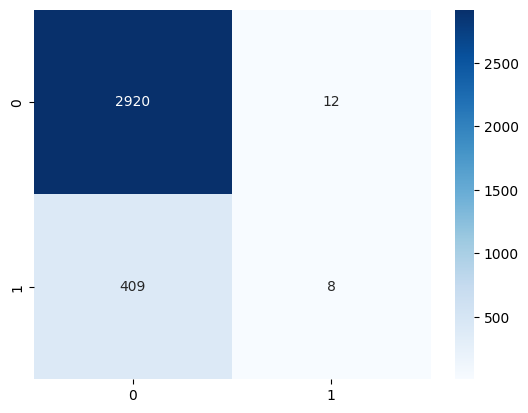

In [34]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## classification report

In [35]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2932
           1       0.40      0.02      0.04       417

    accuracy                           0.87      3349
   macro avg       0.64      0.51      0.48      3349
weighted avg       0.82      0.87      0.82      3349



## Tree Plot

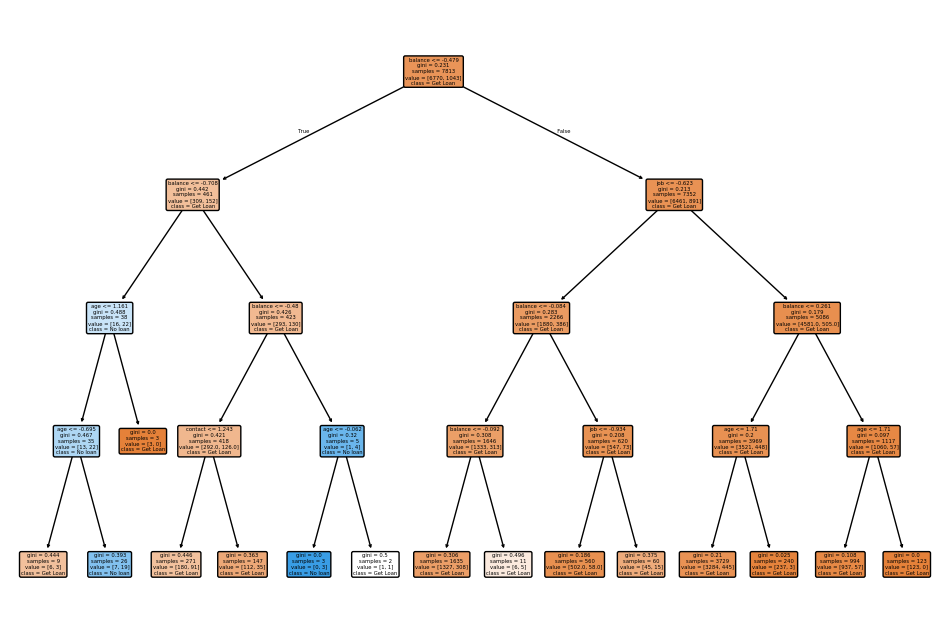

In [36]:
# ploting the tree plot 
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Get Loan', 'No loan'], rounded=True)
plt.show()

In [38]:
df

,age,balance,job,loan,contact
0,59,2343,0,0,2
1,56,45,0,0,2
2,41,1270,9,0,2
3,55,2476,7,0,2
4,54,184,0,0,2
...,...,...,...,...,...
11157,33,1,1,0,0
11158,39,733,7,0,2
11159,32,29,9,0,0
11160,43,0,9,1,0


In [ ]:
new_passenger = pd.DataFrame(([[43,	70000,	9,	0]]), columns=X.columns)
prediction = model.predict(scaler.transform(new_passenger))
if prediction[0] == 1:
    print("loan approved")
else:
    print("Loan not approved")

Loan not approved
